In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()


In [2]:
data = pd.read_csv('C:\python\Hamoye\\archive (5)\\adult.csv')
data


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


This dataset contains info on....write the data description.
The problem is to predict if someone's income is more or less than 50k

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.describe(include='all')


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
# checking for this anomaly "?" and changing them to null values
data[data == '?'] = np.nan
data


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
# checking the null values
data.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

<h2>Handling missing data

In [7]:
# determine the counts of each value in the workclass column
data.workclass.value_counts()


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [8]:
# The workclass column has a high frequency of Private, replacing with just the mode may be good but it would better to go with ffill first
# so i'm going to replace the missing values with forward fill and replace the ones that could not fill with the mode
data.workclass.fillna(
    method='ffill', inplace=True)
data.workclass.fillna(
    (data.workclass.mode()[0]), inplace=True
)


In [9]:
data.occupation.value_counts()


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
# The occupation does not have an overly high frequency of a particular variable, replacing with just the mode may be a mistake so
# so i'm going to replace the missing values with forward fill and replace the ones that could not fill with the mode
data.occupation.fillna(
    method='ffill', inplace=True)
data.occupation.fillna(
    (data.occupation.mode()[0]), inplace=True
)


In [11]:
data['native.country'].value_counts()


United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [12]:
# This native country column also has a high frequency of United states so i'm going to replace the missing values with the mode
data['native.country'].fillna(
    (data['native.country'].mode()[0]), inplace=True
)


In [13]:
data.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

The dataset no longer has a null value

In [14]:
data.duplicated().value_counts()


False    32537
True        24
dtype: int64

In [15]:
data.drop_duplicates(inplace=True)  # dropping duplicates


<AxesSubplot:>

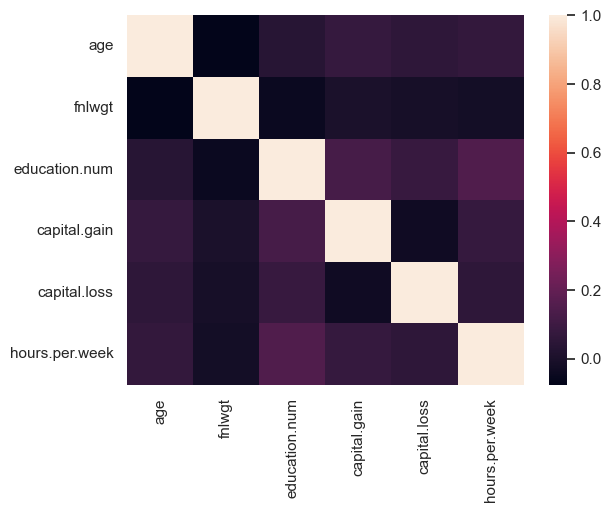

In [16]:
sns.heatmap(data.corr())


In [18]:
# import neccessary libraries for this model
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier


In [19]:
X = data.drop(columns='income')
y = data.income


In [20]:
dummy_data_x = pd.get_dummies(X)
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y)


In [21]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    dummy_data_x, encoded_y, test_size=0.3, random_state=0)


In [22]:
models = {
    RandomForestClassifier(): "Forest",
    XGBClassifier(): "XGBoost",
    DecisionTreeClassifier(): "Decision Tree",
    LinearDiscriminantAnalysis(): "Linear Discriminant",
}
for m in models.keys():
    m.fit(x_train, y_train)
for model, name in models.items():
    print("Accuracy for {values} is : ",
          model.score(x_test, y_test) * 100, "%")


Accuracy for {values} is :  85.17721778324115 %
Accuracy for {values} is :  86.92890801065354 %
Accuracy for {values} is :  80.80311411595984 %
Accuracy for {values} is :  84.40893259577955 %


In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict

XGB = XGBClassifier()
scores = cross_val_score(XGB, dummy_data_x, encoded_y,
                         cv=10, scoring="f1_macro")
scoresp = cross_val_predict(XGB, dummy_data_x, encoded_y, cv=10)
print((scores) * 100, "%")
XGB.fit(x_train, y_train)
y_pred = XGB.predict(x_test)
print(metrics.accuracy_score(y_pred, y_test) * 100, "%")


[56.80350666 86.70767722 47.00161644 71.27874587 74.77597885 73.09958853
 75.88216921 73.92380124 76.15902466 73.40813352] %
86.92890801065354 %


In [24]:
pd.DataFrame(scoresp)


,0
0,0
1,0
2,0
3,0
4,0
...,...
32532,0
32533,1
32534,0
32535,0


Where 0 represents less than 50k and 1 is more than 50k.